---
teorias para como lidar com esta conspiração

tentar (ver como)
manter modelo 1 mas aumentar a % de (1 e) 5 pois são os q têm mais certeza
teoria, sendo q 5 têm mais concenço sobre ser mau
em vez de usar a média usar cada uma como sendo um nódulo diff

---



acrescentar mais nudulos aos já existentes

guardar numero de nodulos existentes  n = ...  
ou ver maior ID(de nódulo)

nodulo para todos os nodulos :

	se classificado com malignanci == 5:
		n = multiply(nodulo, n) 


multiply(nodulo, n):

	apinião para todas as opiniões:
		se opinião == malign
			criar nodulo n+1 => imagem e mascara da opinião
			acrescentá-la a nn_data\images a imagem e mascara
			n +=1
	return n
	
ver como obter radiomics e annotations_ds of seperate ones(worst case add copy of the mean)

In [1]:
import pylidc as pl
#from pylidc.utils import consensus
import matplotlib.pyplot as plt
import numpy as np
#import os
#from pathlib import Path
from utils import get_nodule_class, filename_from_annotation, cluster_annots

In [17]:
anns = pl.query(pl.Annotation).filter(pl.Annotation.malignancy == 5)

'''
print(anns.count())
ann = anns.first()

print(ann.malignancy) 

for ann in anns:
    get_img(ann.scan.patient_id)
    

'''

print(anns)


SELECT annotations.id AS annotations_id, annotations.scan_id AS annotations_scan_id, annotations._nodule_id AS annotations__nodule_id, annotations.subtlety AS annotations_subtlety, annotations."internalStructure" AS "annotations_internalStructure", annotations.calcification AS annotations_calcification, annotations.sphericity AS annotations_sphericity, annotations.margin AS annotations_margin, annotations.lobulation AS annotations_lobulation, annotations.spiculation AS annotations_spiculation, annotations.texture AS annotations_texture, annotations.malignancy AS annotations_malignancy 
FROM annotations 
WHERE annotations.malignancy = ?


In [1]:
print(":)")

:)


In [5]:
'''
func q dada ann e 
'''

import os

def save_nodule_annotation_masks(nodule, patient_id, output_dir='C:/Users/Daniela/Desktop/Fac/3ºano/Lab_IACD/test'):
    """
    Saves the masks for each annotation of a given nodule.

    Parameters:
    - nodule: List of annotations for the nodule (result of scan.cluster_annotations()).
    - patient_id: The patient ID of the scan.
    - output_dir: Directory where the masks will be saved.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Loop through each annotation (different radiologists' opinions) in the nodule
    for i, ann in enumerate(nodule):
        # Get the 3D volume mask for this annotation
        mask = ann.boolean_mask()

        # Generate unique filenames based on patient ID, nodule ID, and annotation index
        mask_filename = os.path.join(output_dir, f"{patient_id}_nodule_{i}_mask.png")

        # Extract the Z slice corresponding to the centroid of the nodule
        centroid = ann.centroid()
        z_slice = int(centroid[2])  # Get the Z-coordinate slice

        # Save the 2D mask slice at the centroid position
        plt.imsave(mask_filename, mask[z_slice], cmap='gray')

        print(f"Saved mask for annotation {i} of nodule to {mask_filename}")


scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == 'LIDC-IDRI-0001')

save_nodule_annotation_masks(scan, 'LIDC-IDRI-0001')
#a.bbox_matrix(pad=pad) for a in anns


AttributeError: 'Scan' object has no attribute 'boolean_mask'

Loading dicom files ... This may take a moment.


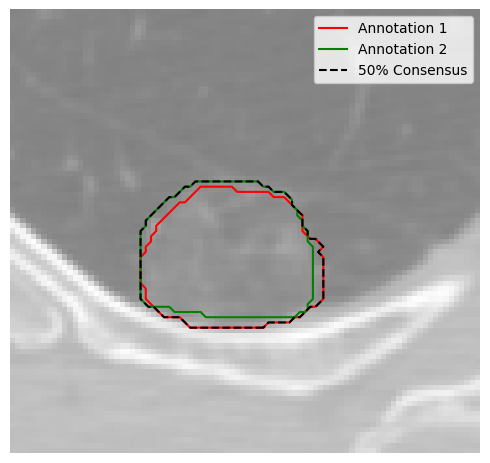

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manim
from skimage.measure import find_contours

import pylidc as pl
from pylidc.utils import consensus


# Query for a scan, and convert it to an array volume.
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == 'LIDC-IDRI-0002').first()
vol = scan.to_volume()

# Cluster the annotations for the scan, and grab one.
nods = scan.cluster_annotations()
anns = nods[0]

# Perform a consensus consolidation and 50% agreement level.
# We pad the slices to add context for viewing.
cmask,cbbox,masks = consensus(anns, clevel=0.5,
                              pad=[(20,20), (20,20), (0,0)])

# Get the central slice of the computed bounding box.
k = int(0.5*(cbbox[2].stop - cbbox[2].start))

# Set up the plot.
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.imshow(vol[cbbox][:,:,k], cmap=plt.cm.gray, alpha=0.5)

# Plot the annotation contours for the kth slice.
colors = ['r', 'g', 'b', 'y']
for j in range(len(masks)):
    for c in find_contours(masks[j][:,:,k].astype(float), 0.5):
        label = "Annotation %d" % (j+1)
        plt.plot(c[:,1], c[:,0], colors[j], label=label)

# Plot the 50% consensus contour for the kth slice.
for c in find_contours(cmask[:,:,k].astype(float), 0.5):
    plt.plot(c[:,1], c[:,0], '--k', label='50% Consensus')

ax.axis('off')
ax.legend()
plt.tight_layout()
#plt.savefig("../images/consensus.png", bbox_inches="tight")
plt.show()

Loading dicom files ... This may take a moment.


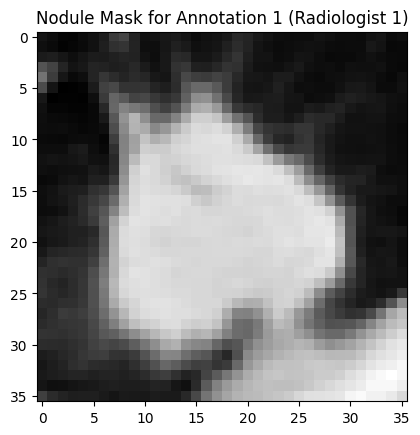

Loading dicom files ... This may take a moment.


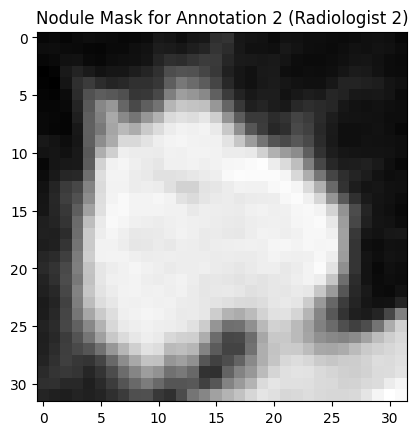

Loading dicom files ... This may take a moment.


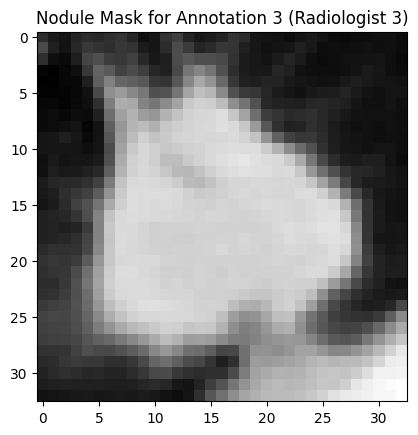

Loading dicom files ... This may take a moment.


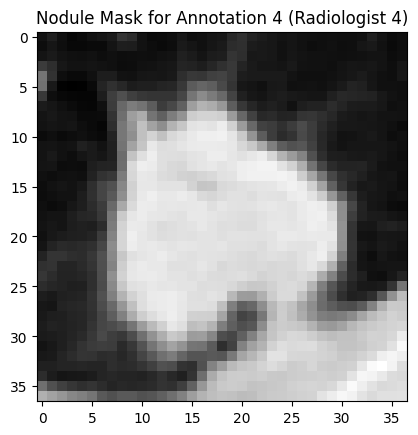

In [26]:
import pylidc as pl
import matplotlib.pyplot as plt

# Step 1: Query the scan for patient LIDC-IDRI-0001
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == 'LIDC-IDRI-0001').first()

# Step 2: Get nodules in this scan
nodules = scan.cluster_annotations()

# Step 3: Select the first nodule
nodule = nodules[0]

# Step 4: Generate masks for each annotation (radiologist)
for i, annotation in enumerate(nodule):
    # Generate the binary mask for the specific annotation
    vol, bbox = annotation.uniform_cubic_resample()

    
    # Step 5: Visualize the middle slice of the mask
    plt.figure()
    plt.imshow(vol[:, :, vol.shape[2] // 2], cmap='gray')
    plt.title(f"Nodule Mask for Annotation {i + 1} (Radiologist {i + 1})")
    plt.show()


Loading dicom files ... This may take a moment.
Annotation(id=88,scan_id=13)


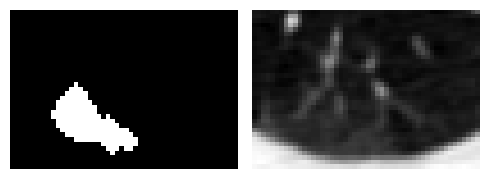

Loading dicom files ... This may take a moment.
Annotation(id=89,scan_id=13)


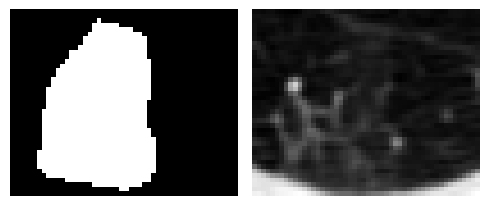

' \n\nann = pl.query(pl.Annotation).first()\nvol = ann.scan.to_volume()\n\npadding = [(30,10), (10,25), (0,0)]\n\nmask = ann.boolean_mask(pad=padding)\nbbox = ann.bbox(pad=padding)\n\nfig,ax = plt.subplots(1,2,figsize=(5,3))\n\nax[0].imshow(vol[bbox][:,:,2], cmap=plt.cm.gray)\nax[0].axis(\'off\')\n\nax[1].imshow(mask[:,:,2], cmap=plt.cm.gray)\nax[1].axis(\'off\')\n\nplt.tight_layout()\n#plt.savefig("../images/mask_bbox.png", bbox_inches="tight")\nplt.show()\n\n'

In [27]:
import pylidc as pl
import matplotlib.pyplot as plt

# Step 1: Query the scan for patient LIDC-IDRI-0001
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == 'LIDC-IDRI-0002').first()

# Step 2: Get nodules in this scan
nodules = scan.cluster_annotations()

# Step 3: Select the first nodule
nodule = nodules[0]

# Step 4: Generate masks for each annotation (radiologist)
for i, annotation in enumerate(nodule):

    vol = annotation.scan.to_volume()

    #padding = [(30,10), (10,25), (0,0)]
    print(annotation)
    mask = annotation.boolean_mask()#pad=padding
    bbox = annotation.bbox()#pad=padding
        
    fig,ax = plt.subplots(1,2,figsize=(5,3))


    
    img = vol[bbox]
    
    #img[~mask] = -1
    ax[0].imshow(mask[:,:,2], cmap=plt.cm.gray)
    ax[0].axis('off')
    
    ax[1].imshow(vol[bbox][:,:,2], cmap=plt.cm.gray)
    ax[1].axis('off')

    

    plt.tight_layout()
    #plt.savefig("../images/mask_bbox.png", bbox_inches="tight")
    plt.show()

    '''
    # Generate the binary mask for the specific annotation
    vol, bbox = annotation.uniform_cubic_resample()
    
    # Step 5: Visualize the middle slice of the mask
    plt.figure()
    plt.imshow(vol[:, :, vol.shape[2] // 2], cmap='gray')
    plt.title(f"Nodule Mask for Annotation {i + 1} (Radiologist {i + 1})")
    plt.show()
    '''
    

##########################################

''' 

ann = pl.query(pl.Annotation).first()
vol = ann.scan.to_volume()

padding = [(30,10), (10,25), (0,0)]

mask = ann.boolean_mask(pad=padding)
bbox = ann.bbox(pad=padding)

fig,ax = plt.subplots(1,2,figsize=(5,3))

ax[0].imshow(vol[bbox][:,:,2], cmap=plt.cm.gray)
ax[0].axis('off')

ax[1].imshow(mask[:,:,2], cmap=plt.cm.gray)
ax[1].axis('off')

plt.tight_layout()
#plt.savefig("../images/mask_bbox.png", bbox_inches="tight")
plt.show()

'''

preguntar Pedro como fazer com q a img e a mask se fundam

In [8]:
import pylidc as pl
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Query the scan for patient LIDC-IDRI-0001
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == 'LIDC-IDRI-0001').first()

# Step 2: Get nodules in this scan
nodules = scan.cluster_annotations()

# Step 3: Select the first nodule
nodule = nodules[0]

# Step 4: Get the original CT scan volume
ct_scan = scan.to_volume()  # Full CT scan as a 3D numpy array

# Step 5: Generate masks for each annotation (radiologist)
for i, annotation in enumerate(nodule):
    # Generate the binary mask and get bounding box in the resampled space
    vol, bbox = annotation.uniform_cubic_resample()

    # bbox is an array with the shape (2, 3), where:
    # bbox[0] contains the min coordinates (x_min, y_min, z_min)
    # bbox[1] contains the max coordinates (x_max, y_max, z_max)
    x_min, y_min, z_min = bbox[0]
    x_max, y_max, z_max = bbox[1]

    # Get the corresponding slice from the CT scan within the bounding box
    # Note: we convert the bounding box range into integer indices for the CT scan
    ct_bbox = ct_scan[x_min:x_max, y_min:y_max, z_min:z_max]

    # Get the middle slice in the z-direction (for both CT scan and mask)
    z = vol.shape[2] // 2  # Middle slice index in mask space
    ct_slice = ct_bbox[:, :, z]  # Middle slice from CT scan within bounding box
    mask_slice = vol[:, :, z]    # Middle slice from the mask

    # Step 6: Overlay the mask on the CT scan slice
    plt.figure()
    plt.imshow(ct_slice, cmap='gray')  # Display the CT scan slice
    plt.imshow(np.ma.masked_where(mask_slice == 0, mask_slice), cmap='Reds', alpha=0.5)  # Overlay the mask
    plt.title(f"Nodule Mask Overlay for Annotation {i + 1} (Radiologist {i + 1})")
    plt.show()


Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.


ValueError: too many values to unpack (expected 3)

END OF SILLY TEST FASE
---

Processing first nodule in scan LIDC-IDRI-0078...


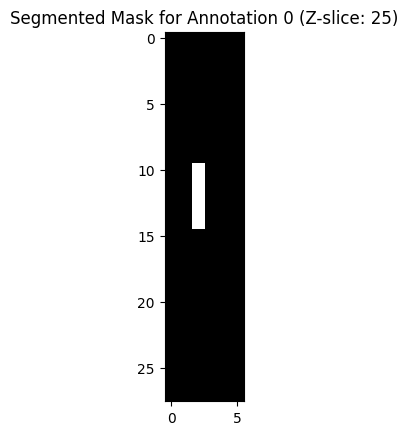

Processed segmented mask for annotation 0 of nodule.


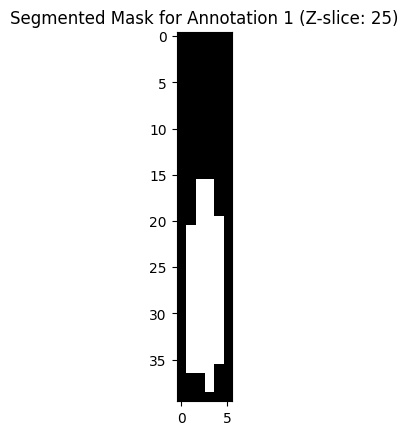

Processed segmented mask for annotation 1 of nodule.


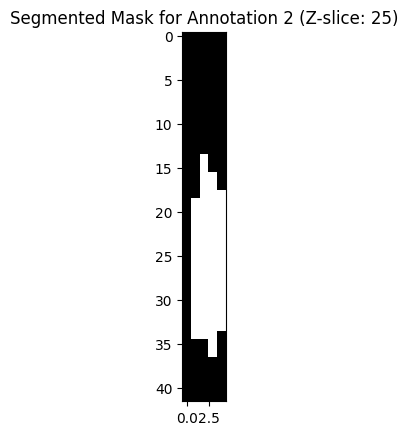

Processed segmented mask for annotation 2 of nodule.


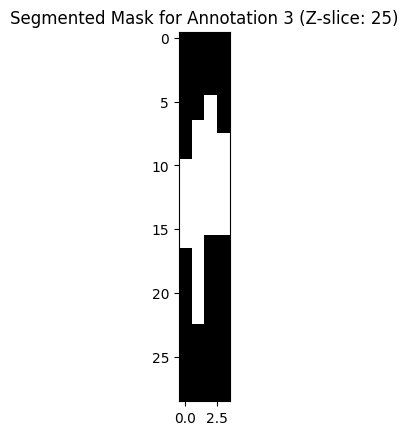

Processed segmented mask for annotation 3 of nodule.
Processing first nodule in scan LIDC-IDRI-0069...


IndexError: index 40 is out of bounds for axis 0 with size 18

In [4]:
import matplotlib.pyplot as plt

# Assume you have already queried the scans and clustered them into nodules
scans = pl.query(pl.Scan).all()

for scan in scans:
    try:
        # Cluster annotations into nodules
        nodules = scan.cluster_annotations(tol=10)
    except ClusterError:
        print(f"ClusterError: Skipping scan {scan.patient_id} due to clustering issue.")
        continue

    # Process the first nodule (for example)
    if nodules:
        first_nodule = nodules[0]
        print(f"Processing first nodule in scan {scan.patient_id}...")

        # Loop through each annotation for the nodule
        for i, ann in enumerate(first_nodule):

            # Get the centroid coordinates (without parentheses)
            centroid = ann.centroid

            # Visualize the mask slice at the centroid position
            vol = annotation.scan.to_volume()


            # Get the 3D segmented mask for this annotation
            mask = annotation.boolean_mask()#pad=padding
            bbox = annotation.bbox()#pad=padding
                
            fig,ax = plt.subplots(1,2,figsize=(5,3))



            img = vol[bbox]
            
            img[~mask] = -1


            # Optionally, save the mask slice as an image
            #plt.imsave(f"segmented_mask_{scan.patient_id}_annotation_{i}.png", segmented_mask[z_slice], cmap='gray')

            print(f"Processed segmented mask for annotation {i} of nodule.")


In [13]:

from pylidc.Scan import ClusterError

highest_annotation_id = 6858
scans = pl.query(pl.Scan).all()

for scan in scans:

    try:
        # Get all nodules for the scan with increased tolerance
        nodules = scan.cluster_annotations(tol=10)  # Increase the tolerance if needed
    except ClusterError:
        print(f"ClusterError: Skipping scan {scan.patient_id} due to clustering issue.")
        continue  # Skip this scan if clustering fails

    
    # Loop over each nodule
    for nodule in nodules:
        # Get the malignancy ratings for all annotations for the nodule
        malignancies = [ann.malignancy for ann in nodule]
        
        # Check if all annotations for this nodule have a malignancy score of 5
        ''' 
        pk tem q ser todos? => faz média de várias opiniões e dá 5
        '''

        #makee sure that all docks think it is bad
        if malignancies.count(5) >= 3 and malignancies.count(4) <= 1: #all(m == 5 for m in malignancies)
            print(f"Nodule in scan {scan.patient_id} with malignancy 5:")
            print(f"Nodule details: {nodule}")

            #to be continued
            ''' 
            criar nodulo n+1 => imagem e mascara da opinião
			acrescentá-la a nn_data\images a imagem e mascara
			n +=1
	        return n

            ask to get the img of each nodule and the mask, give new id as (highest id +1)
            '''

            #untested lacks the save img and mask part
            # Now, create new nodules for each annotation that meets the criteria
            for ann in nodule:
                # Increment the nodule counter to assign unique IDs
                highest_annotation_id += 1
                
                # Here you would treat this annotation as a separate "nodule"
                print(f"New Nodule ID: {highest_annotation_id}")
                print(f"Annotation details: malignancy={ann.malignancy}, "
                      f"center=({ann.centroid()})")
                
                # You can store or process the annotation as a separate "nodule"
                # For example, save or analyze the annotation data here


    

Nodule in scan LIDC-IDRI-0007 with malignancy 5:
Nodule details: [Annotation(id=125,scan_id=18)]
Nodule in scan LIDC-IDRI-0020 with malignancy 5:
Nodule details: [Annotation(id=265,scan_id=31)]
Nodule in scan LIDC-IDRI-0029 with malignancy 5:
Nodule details: [Annotation(id=314,scan_id=40)]
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
ClusterError: Skipping scan LIDC-IDRI-0055 due to clustering issue.
Nodule in scan LIDC-IDRI-0058 with malignancy 5:
Nodule details: [Annotation(id=606,scan_id=69), Annotation(id=609,scan_id=69), Annotation(id=612,scan_id=69)]
Nodule in scan LIDC-IDRI-0060 with malignancy 5:
Nodule details: [Annotation(id=620,scan_id=71), Annotation(id=626,scan_id=71)]
Nodule in scan LIDC-IDRI-0060 with malignancy 5:
Nodule details: [Annotation(id=625,scan_id=71)]
Nodule in scan LIDC-IDRI-0072 with malignancy 5:
Nodule details: [Annotation(id=725,scan_id=82), Annotation(id=726,scan_id=82), Annotation(id=727,scan_i

KeyboardInterrupt: 